## Linking Google Drive to Colab

In [1]:
#@title Mount Google Drive {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 %cd '/content/drive/MyDrive/Datascience'
! ls

/content/drive/MyDrive/Datascience
1.1_age_input_output
1.1_age_input_output-20220903T113134Z-002.zip
1.2_gender_input_output
1.2_gender_input_output-20220903T113136Z-001.zip
1.3_test_input
1.3_test_input-20220903T113145Z-001.zip
2.1_train_age_model.ipynb
2.2_train_gender_model.ipynb
2.3_Pred_Final.ipynb


## Importing essential libraries

In [3]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


## Loading Age/Gender/Emotion Models

In [4]:
export_dir='./1.1_age_input_output/output/age_model_pretrained.h5'
age_model = load_model(export_dir)

# summarize model.
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 128)      0

In [5]:
# load and evaluate a saved model
export_dir='./1.2_gender_input_output/output/gender_model_pretrained.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 70)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 65)        41015     
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 65)       260       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 65)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 60)        35160 

In [6]:
# Labels on Age, Gender and Emotion to be predicted

age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']

## Loading Test Images

## Results on Age/Gender/Emotion

In [7]:
def detect(img_path):

  test_image = cv2.imread(img_path)
  gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier('./1.3_test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(gray, 1.3, 4)

  i = 0

  for (x,y,w,h) in faces:
    i = i+1
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,255),2)

    img_gray=gray[y:y+h,x:x+w]
    
    gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
    gender_image_array = np.array(gender_img)
    gender_input = np.expand_dims(gender_image_array, axis=0)
    output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

    age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)
    output_age = age_ranges[np.argmax(age_model.predict(age_input))]


    output_str = str(i) + ": "+  output_gender + ', '+ output_age 
    print(output_str)
  
    col = (0,255,0)

    cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

1: male, 28-45
2: male, 66-116


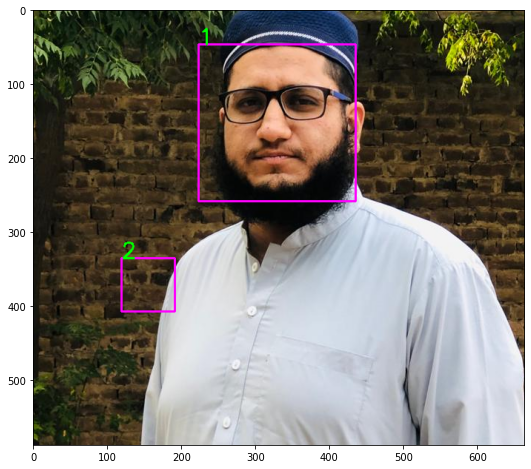

In [8]:
detect("./1.3_test_input/images/7.jpeg")

1: male, 28-45


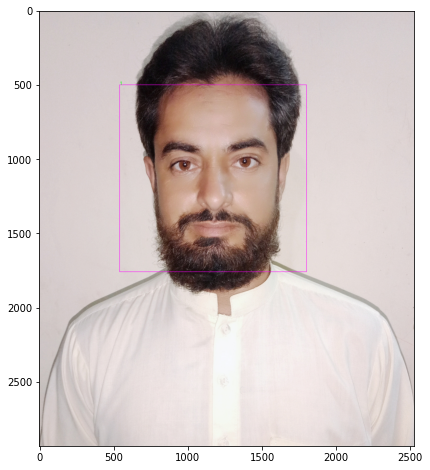

In [9]:
detect("./1.3_test_input/images/m.iqbal2.jpg")

1: male, 28-45
2: male, 21-27
3: male, 21-27
4: male, 28-45


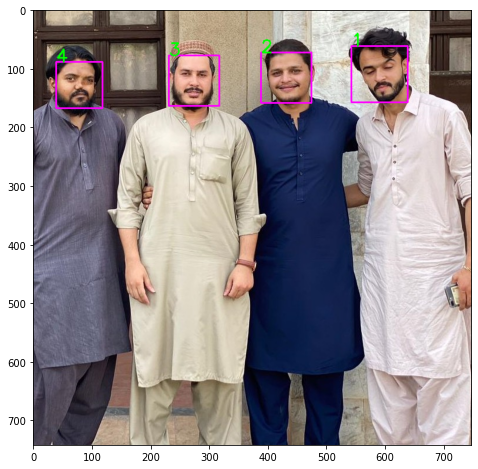

In [10]:
detect("./1.3_test_input/images/3.jpeg")

1: female, 3-9


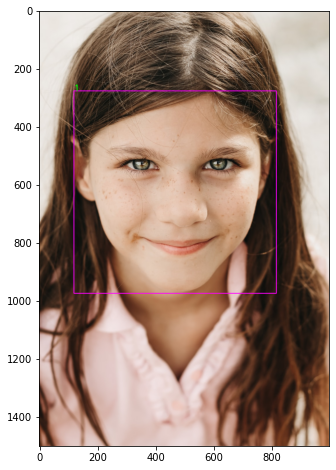

In [11]:
detect("./1.3_test_input/images/fe.jpg")

1: male, 1-2


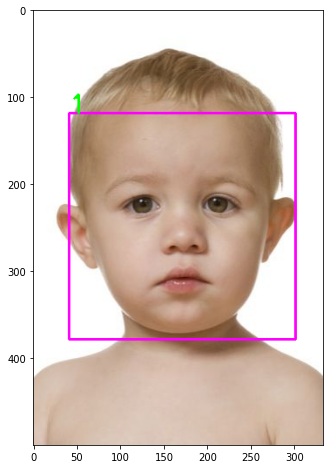

In [12]:
detect("./1.3_test_input/images/babu.jpg")

1: female, 28-45
2: male, 28-45
3: female, 28-45
4: male, 28-45


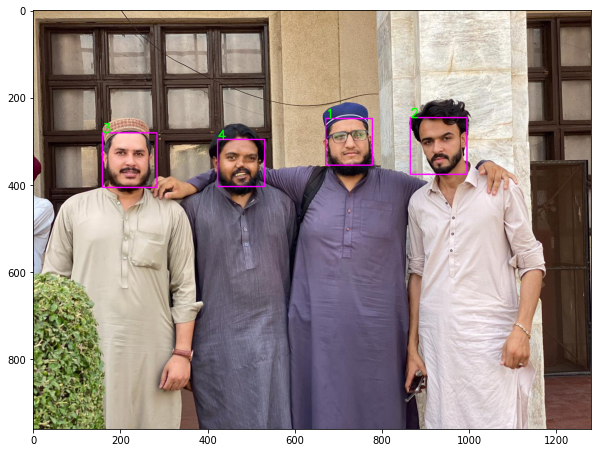

In [13]:
detect("./1.3_test_input/images/2.jpeg")


1: female, 28-45


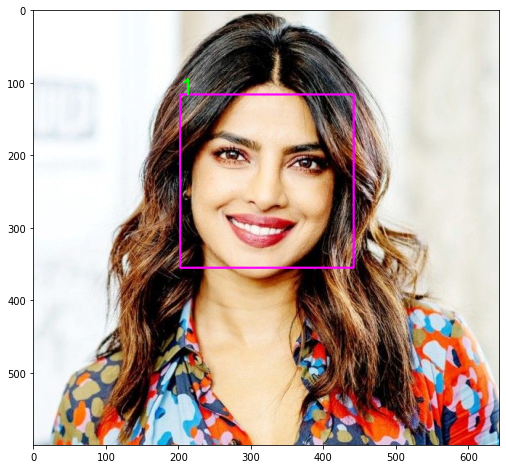

In [14]:
detect("./1.3_test_input/images/priyanka_chopra.jpg")
